Скачайте текст произведения «Война и мир»: ссылка на GitHub.
Очистите его, оставив только русские буквы и символы пробела.
Постройте матрицу переходных вероятностей.
Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».
Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.
Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.
Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm_notebook as tqdm
%matplotlib inline
sns.set()
from hmmlearn.hmm import GaussianHMM
import os

In [2]:
os.environ["OMP_NUM_THREADS"] = '3'

In [3]:
regex = re.compile("[а-я]+")
def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

In [4]:
# загружаем данные
os.chdir(r'd:\ml\временные ряды')
text = ""
for i in range(1, 5):
    with open(f'tom_{i}.txt', encoding='utf-8') as f:
        tom = f.read().lower()
    text = text + words_only(tom) + " "
    print ('добавлен том ', i)

добавлен том  1
добавлен том  2
добавлен том  3
добавлен том  4


Постройте матрицу переходных вероятностей.

In [5]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [6]:
probabilities

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [8]:
probabilities

array([[1.5000e+01, 1.6220e+03, 8.7790e+03, ..., 2.0510e+03, 6.4250e+03,
        4.5763e+04],
       [2.6090e+03, 2.4000e+01, 2.1500e+02, ..., 1.1000e+01, 1.1710e+03,
        6.5700e+02],
       [1.4787e+04, 3.6000e+01, 8.9000e+01, ..., 1.0000e+00, 5.5200e+02,
        1.7551e+04],
       ...,
       [1.0000e+00, 1.1140e+03, 0.0000e+00, ..., 9.7000e+01, 0.0000e+00,
        8.0340e+03],
       [0.0000e+00, 1.0100e+02, 7.7500e+02, ..., 3.1500e+02, 4.4100e+02,
        2.9696e+04],
       [6.3810e+03, 1.9729e+04, 4.0837e+04, ..., 1.0400e+02, 3.7840e+03,
        0.0000e+00]])

In [9]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [10]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

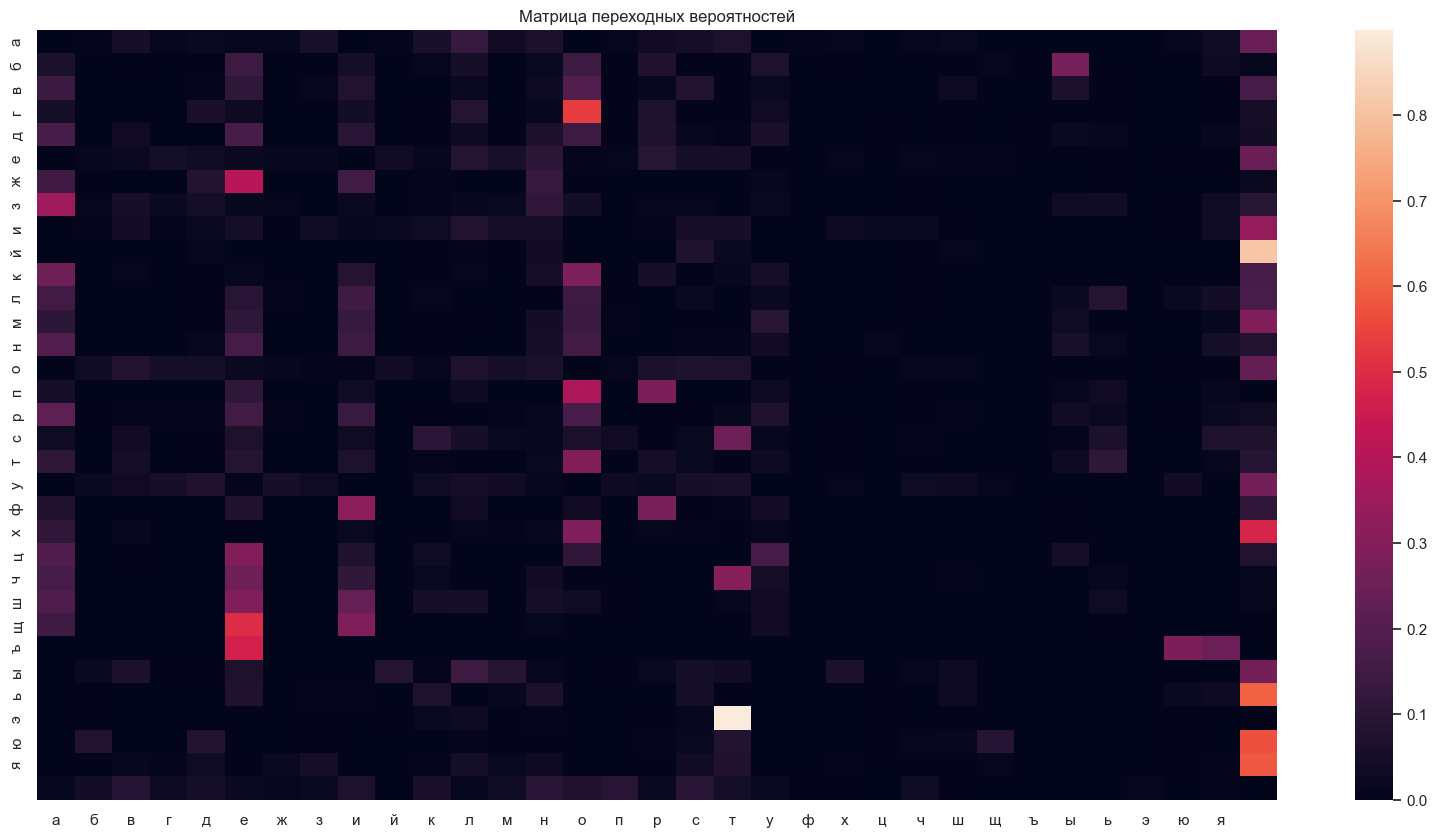

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df, xticklabels=list(RUSSIAN), yticklabels=list(RUSSIAN))
plt.title('Матрица переходных вероятностей')
plt.show()

Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».

In [12]:
# допущение - в строке может быть пробел
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for i in RUSSIAN:
    for j in RUSSIAN:
        proba = prior * probabilities[start, POS[i]] * probabilities[POS[i], POS[j]] *probabilities[POS[j], end]
        if proba > 0:
            print(''.join(['п', i,j, 'р']), proba)

паар 5.1954072864925496e-09
пабр 1.0247374565432673e-06
павр 1.1752937483181047e-06
пагр 1.3011064220401548e-06
падр 2.9999574191736857e-06
паер 2.00058282071501e-06
пажр 7.526362941496548e-09
пазр 1.2432687212706234e-06
паир 2.3082625775945094e-08
пайр 2.4533047953529775e-08
пакр 4.942252868120888e-06
памр 1.0231666759428456e-07
панр 1.1369024941770535e-07
паор 7.95214318579869e-09
папр 5.612742574992265e-06
парр 2.3701638149406596e-08
паср 5.136515191383607e-07
патр 5.635504892211659e-06
паур 6.800750379317669e-08
пафр 3.250087526697428e-06
пахр 2.466582314283215e-07
пачр 2.6115014392297708e-08
пашр 5.4177423632989325e-09
пащр 4.68289641627989e-09
паэр 8.764485865175362e-11
паюр 1.6393505991235308e-07
паяр 1.4316159812203055e-07
па р 9.695353027294278e-06
пгар 2.7436797111869733e-08
пгвр 4.204584654949708e-10
пггр 5.565325745851635e-11
пгдр 5.277474923392563e-08
пгер 3.404482734876333e-08
пгжр 7.57264705850695e-14
пгзр 3.6926625497656344e-12
пгир 4.52740528703026e-09
пгкр 2.946815803

Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.

In [13]:
probabilities[POS['п']]

array([5.19555563e-02, 0.00000000e+00, 0.00000000e+00, 3.96229219e-04,
       0.00000000e+00, 1.09838041e-01, 0.00000000e+00, 0.00000000e+00,
       3.33823117e-02, 0.00000000e+00, 3.12030510e-03, 3.15167324e-02,
       1.65095508e-05, 3.10379555e-03, 3.84292813e-01, 1.79954103e-03,
       2.77872249e-01, 2.14624160e-04, 1.89859834e-03, 2.92879431e-02,
       7.92458437e-04, 0.00000000e+00, 5.61324726e-04, 3.68162982e-03,
       2.31133711e-04, 8.25477539e-05, 0.00000000e+00, 1.16392333e-02,
       3.75922471e-02, 3.30191016e-05, 0.00000000e+00, 1.47265193e-02,
       1.96463654e-03])

In [14]:
s = ['б']
length = 8
for i in range(length-1):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бенесит 


Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.

In [15]:
# берем цены закрытия акций сбербанка в период с 11.01.10 по 24.02.24
series = pd.read_csv('SBER_100101_240223.txt', delimiter=';')['<CLOSE>']
#series = series [-300:]

In [16]:
from hmmlearn.hmm import GaussianHMM

In [17]:
values = series.values.reshape(-1,1)

In [18]:
len (values)

3541

In [19]:
for n in range(1, 20):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -20386.48094426013
2 -16965.61040017532
3 -16965.60843469164
4 -15836.71616569371
5 -15836.716471911039
6 -14388.75933140666
7 -14820.037732944074
8 -14045.382938853889
9 -15044.690909172654
10 -13508.204000058266
11 -13128.527925479197
12 -13224.436342250083
13 -12675.072583216775
14 -13348.411646987444
15 -13256.876214037307
16 -12388.192596240333
17 -12901.757663204939
18 -12177.775859838692
19 -12849.693075465271


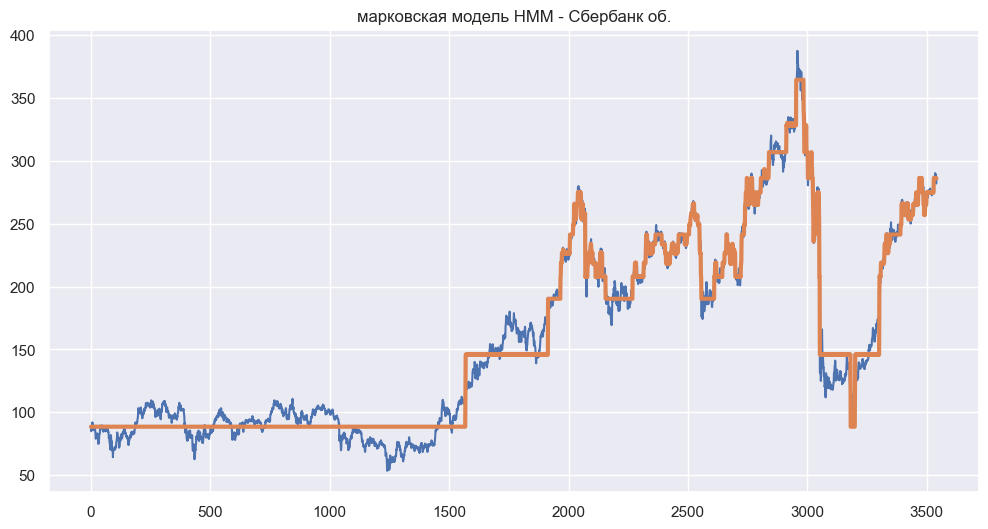

In [20]:
model = GaussianHMM(n_components=50,
                        covariance_type="full",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)
plt.title("марковская модель HMM - Сбербанк об.")
plt.show()

In [21]:
a = labels[-1]
prediction = []
for i in range(10):
    next_val = np.random.choice(50, p=model.transmat_[a])
    prediction.append(model.means_[next_val])

In [22]:
new_series = np.concatenate((values, np.array(prediction)))

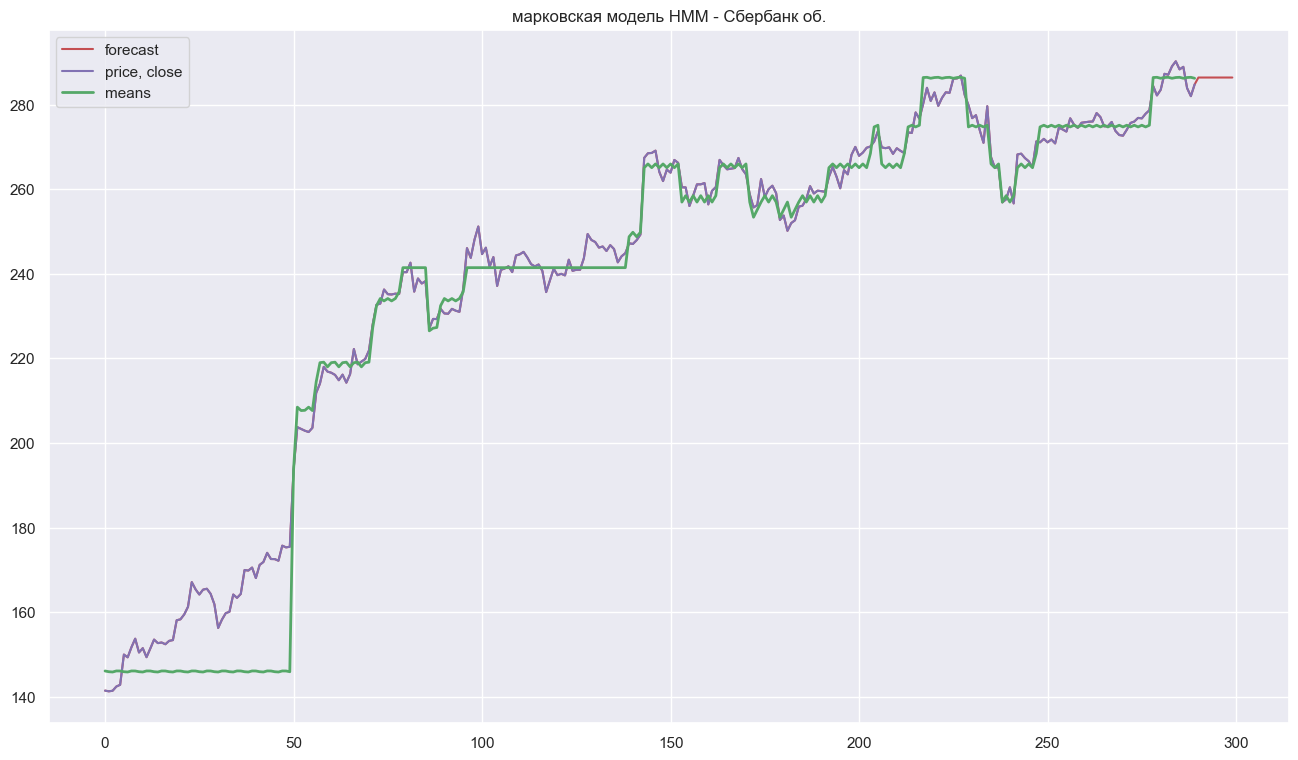

In [25]:
# выведем последние 300 значений
plt.figure(figsize=(16,9))
plt.plot(new_series[-300:], color="r", label='forecast')
plt.plot(values[-290:], color ="m", label='price, close')
plt.plot(means[-290:], linewidth=2, color = "g", label='means')
plt.title("марковская модель HMM - Сбербанк об.")
plt.legend()
plt.show()

провел эскперименты с вариантами n_components и кол-вом данных в тайм серии. Не подходит этот метод для анализа / предсказаний биржевых цен